<a href="https://colab.research.google.com/github/hm-jeong/Study/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mnist dataset load
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


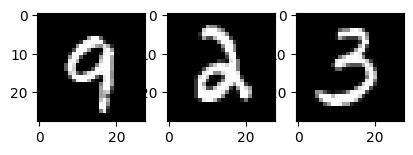

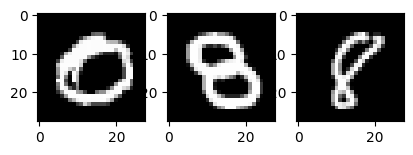

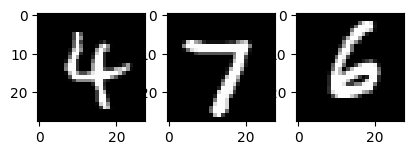

In [2]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D

In [5]:
# model construction
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), 2, activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), 2, activation = "relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [6]:
# model training
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 16s 39ms/step - loss: 0.1370 - acc: 0.9576 - val_loss: 3.7667 - val_acc: 0.3441
Epoch 2/30
235/235 [==============================] - 6s 26ms/step - loss: 0.0323 - acc: 0.9903 - val_loss: 0.3388 - val_acc: 0.8867
Epoch 3/30
235/235 [==============================] - 5s 23ms/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0429 - val_acc: 0.9862
Epoch 4/30
235/235 [==============================] - 5s 23ms/step - loss: 0.0135 - acc: 0.9954 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 5/30
235/235 [==============================] - 6s 23ms/step - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0561 - val_acc: 0.9869
Epoch 6/30
235/235 [==============================] - 5s 23ms/step - loss: 0.0099 - acc: 0.9970 - val_loss: 0.0424 - val_acc: 0.9882
Epoch 7/30
235/235 [==============================] - 6s 23ms/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.0573 - val_acc: 0.9839
Epoch 8/30
235/235 [==============================] - 6s 25ms/step -

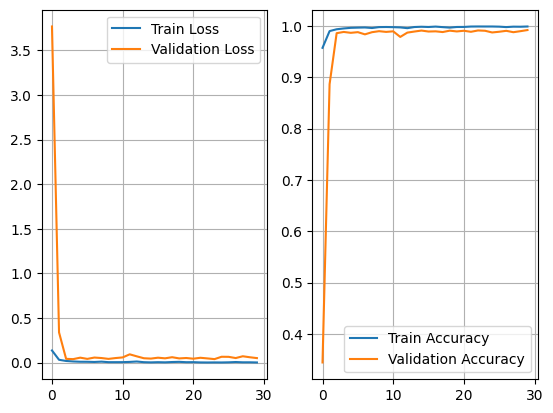

In [7]:
# training result visualization
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

1/1 [==============================] - 0s 310ms/step
Actual : 4	Predict : 4


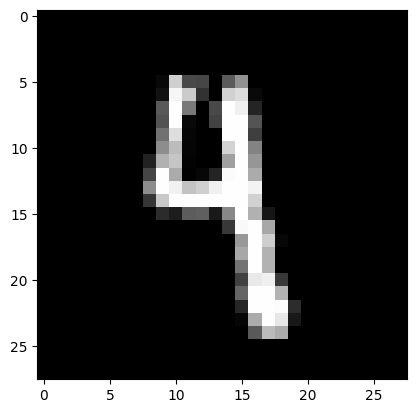

In [8]:
index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [9]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

313/313 [==============================] - 1s 2ms/step
[115, 247, 340, 445, 582, 720, 846, 947, 1014, 1156, 1226, 1232, 1242, 1247, 1299, 1378, 1393, 1522, 1709, 1790, 2035, 2118, 2130, 2182, 2276, 2280, 2329, 2406, 2447, 2454, 2597, 2654, 2678, 2771, 2896, 2915, 3109, 3225, 3422, 3520, 3558, 3749, 3853, 3941, 4027, 4176, 4360, 4507, 4536, 4571, 4639, 4740, 4761, 4783, 4807, 4814, 4823, 4942, 5228, 5331, 5752, 5937, 6101, 6532, 6597, 6625, 7849, 8382, 8527, 9009, 9015, 9024, 9679, 9692, 9729, 9777, 9839]
총 틀린 갯수 :  77


Actual : 5	Predict : 0


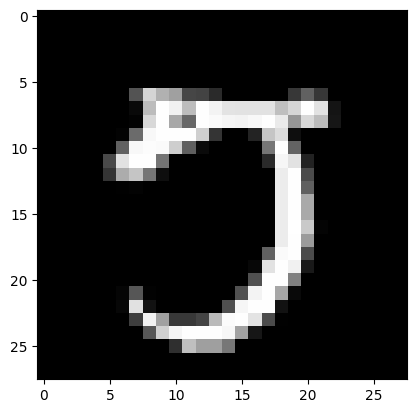

In [10]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)